In [1]:
import scipy.io as sio
import numpy as np
import os
import sys
from PIL import Image
import errno
from sklearn.decomposition import PCA
from scipy.stats import itemfreq
from skimage import data, feature


In [2]:
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

 #设置默认显示参数
plt.rcParams['figure.figsize'] = (15, 10)        # 图像显示大小
plt.rcParams['image.interpolation'] = 'nearest'  # 最近邻差值: 像素为正方形
plt.rcParams['image.cmap'] = 'gray'  # 使用灰度输出而不是彩色输出

In [3]:
mat_file = "dataset/PIE dataset/Pose05_64x64.mat"

data = sio.loadmat(mat_file)

data

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon May 08 13:10:30 2017',
 '__version__': '1.0',
 'fea': array([[ 8,  9,  9, ..., 35, 36, 42],
        [ 6,  7,  7, ..., 38, 32, 31],
        [ 8,  8,  6, ..., 26, 25, 23],
        ..., 
        [11, 10,  8, ..., 36, 40, 42],
        [ 9, 11,  9, ..., 29, 31, 36],
        [12,  9,  9, ..., 29, 34, 38]], dtype=uint8),
 'gnd': array([[ 1],
        [ 1],
        [ 1],
        ..., 
        [68],
        [68],
        [68]], dtype=uint8),
 'isTest': array([[ 0.],
        [ 0.],
        [ 0.],
        ..., 
        [ 1.],
        [ 0.],
        [ 0.]])}

In [4]:
def read_mat ( path ):
    c = 0
    X ,y ,isTest= [], [],[]

    for filename in os.listdir ( path ):
        if (filename != 'Thumbs.db'):
            data = sio.loadmat( os.path.join ( path , filename ))
#             np.concatenate((X, data['fea']),axis = 0)
#             np.concatenate((y, data['gnd']),axis = 0)
            if len(X) == 0 and len(y) == 0:
                X = data['fea']
                y = data['gnd']
                isTest = data['isTest']
            else:
                X = np.concatenate((data['fea'], X), axis = 0)
                y =np.concatenate((data['gnd'], y), axis = 0)
                isTest = np.concatenate((data['isTest'],isTest), axis = 0)
    return X, y, isTest

In [5]:
ROOT = 'dataset/PIE dataset/'
X,y,isTest = read_mat(ROOT)
X = np.array(X)
y = np.array(y)
isTest = np.array(isTest)

print X.shape
print X
print y.shape
print y
print isTest.shape
print isTest

(11554, 4096)
[[ 46  52  48 ..., 226 234 238]
 [ 50  39  32 ..., 255 254 254]
 [ 47  47  39 ..., 254 254 254]
 ..., 
 [ 11  10   8 ...,  36  40  42]
 [  9  11   9 ...,  29  31  36]
 [ 12   9   9 ...,  29  34  38]]
(11554, 1)
[[ 1]
 [ 1]
 [ 1]
 ..., 
 [68]
 [68]
 [68]]
(11554, 1)
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 0.]
 [ 0.]]


In [6]:
X_train, X_test, y_train, y_test = [],[],[],[]
for i in np.arange(len(isTest)):
    if(isTest[i] == 0):
        X_train.append(np.asarray(X[i].reshape((64,64)), dtype=np.uint8))
        y_train.append(y[i])
    else:
        X_test.append(np.asarray(X[i].reshape((64,64)), dtype=np.uint8))
        y_test.append(y[i])

print len(X_train)

10262


In [10]:
y_train = [j for i in y_train for j in i]
y_test = [j for i in y_test for j in i]


In [16]:
from facerec.preprocessing import TanTriggsPreprocessing 
from facerec.feature import SpatialHistogram
from facerec.lbp import LPQ,ExtendedLBP,OriginalLBP
from facerec.operators import ChainOperator
from facerec.classifier import NearestNeighbor
from facerec.distance import ChiSquareDistance
from facerec.model import PredictableModel


model = PredictableModel(feature=SpatialHistogram(lbp_operator=OriginalLBP()),
                         classifier=NearestNeighbor(dist_metric=ChiSquareDistance(), k=1))
model.compute(X_train, y_train)


In [18]:
from sklearn.metrics import classification_report
predictions = []
for i in np.arange(isTest.shape[0]):
    prediction = model.predict(X_test[i])
    label = prediction[0]
    predictions.append(label)
    
    


IndexError: list index out of range

In [22]:
print len(predictions)
print classification_report(y_test[:1292],predictions, digits = 4)

1292
             precision    recall  f1-score   support

          1     1.0000    1.0000    1.0000        19
          2     1.0000    1.0000    1.0000        19
          3     1.0000    1.0000    1.0000        19
          4     1.0000    1.0000    1.0000        19
          5     1.0000    1.0000    1.0000        19
          6     1.0000    1.0000    1.0000        19
          7     1.0000    1.0000    1.0000        19
          8     0.9500    1.0000    0.9744        19
          9     1.0000    1.0000    1.0000        19
         10     1.0000    1.0000    1.0000        19
         11     1.0000    1.0000    1.0000        19
         12     1.0000    1.0000    1.0000        19
         13     0.9500    1.0000    0.9744        19
         14     1.0000    1.0000    1.0000        19
         15     1.0000    0.9474    0.9730        19
         16     1.0000    1.0000    1.0000        19
         17     1.0000    1.0000    1.0000        19
         18     1.0000    1.0000    1.00

In [28]:
lbp_Feature = []
lbp_Feature = model.feature.extract(X_train[0])

print model.feature
print lbp_Feature
print lbp_Feature.shape

SpatialHistogram (operator=OriginalLBP (neighbors=8), grid=(8, 8))
[ 0.          0.          0.02040816 ...,  0.          0.          0.10204082]
(16384,)


In [12]:
# show the shape of X_train X_test y_train y_test
print X_train
print X_train.shape
print X_test
print X_test.shape

y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print y_train.shape
print y_test.shape

[array([[ 46,  52,  48, ..., 117, 107, 125],
       [ 49,  47,  50, ..., 111, 104, 118],
       [ 51,  49,  49, ..., 114, 111, 112],
       ..., 
       [ 38,  35,  36, ..., 254, 254, 255],
       [ 43,  39,  34, ..., 251, 253, 253],
       [ 45,  41,  37, ..., 226, 234, 238]], dtype=uint8), array([[ 50,  39,  32, ...,  20,  62, 106],
       [ 49,  41,  30, ...,  19,  74, 120],
       [ 49,  42,  38, ...,  15,  66, 130],
       ..., 
       [ 32,  34,  34, ..., 215, 208, 200],
       [ 34,  32,  29, ..., 249, 245, 240],
       [ 37,  33,  33, ..., 255, 254, 254]], dtype=uint8), array([[ 47,  47,  39, ..., 101, 113, 132],
       [ 49,  47,  33, ...,  90, 117, 126],
       [ 50,  46,  35, ...,  84, 119, 123],
       ..., 
       [ 35,  38,  40, ..., 254, 254, 254],
       [ 32,  35,  37, ..., 254, 254, 254],
       [ 33,  35,  35, ..., 254, 254, 254]], dtype=uint8), array([[ 73, 143,  91, ...,  57,  73, 104],
       [121, 136,  54, ...,  46,  89,  95],
       [131, 101, 122, ...,  57,  9

AttributeError: 'list' object has no attribute 'shape'

In [29]:
model_lbp_knn_10 = PredictableModel(feature=SpatialHistogram(lbp_operator=OriginalLBP()),
                         classifier=NearestNeighbor(dist_metric=ChiSquareDistance(), k=10))
model_lbp_knn_10.compute(X_train, y_train)




In [34]:
from sklearn.metrics import classification_report
predictions_knn10 = []
for i in np.arange(1292):
    prediction = model_lbp_knn_10.predict(X_test[i])
    label = prediction[0]
    predictions_knn10.append(label)

In [35]:
print classification_report(y_test[:1292],predictions_knn10, digits = 4)

             precision    recall  f1-score   support

          1     1.0000    1.0000    1.0000        19
          2     0.9048    1.0000    0.9500        19
          3     1.0000    1.0000    1.0000        19
          4     1.0000    1.0000    1.0000        19
          5     1.0000    1.0000    1.0000        19
          6     1.0000    1.0000    1.0000        19
          7     1.0000    1.0000    1.0000        19
          8     1.0000    0.9474    0.9730        19
          9     1.0000    1.0000    1.0000        19
         10     1.0000    1.0000    1.0000        19
         11     1.0000    1.0000    1.0000        19
         12     1.0000    1.0000    1.0000        19
         13     1.0000    1.0000    1.0000        19
         14     1.0000    1.0000    1.0000        19
         15     1.0000    1.0000    1.0000        19
         16     0.9500    1.0000    0.9744        19
         17     1.0000    1.0000    1.0000        19
         18     1.0000    1.0000    1.0000   

In [36]:
## lbp size divided into 1*1 regions
model_lbp_sz1_1_knn_10 = PredictableModel(feature=SpatialHistogram(lbp_operator=OriginalLBP(),sz = (1,1)),
                         classifier=NearestNeighbor(dist_metric=ChiSquareDistance(), k=10))
model_lbp_sz1_1_knn_10.compute(X_train, y_train)


## caculate prediction
predictions_lbp_sz1_1_knn_10 = []
for i in np.arange(1292):
    prediction = model_lbp_sz1_1_knn_10.predict(X_test[i])
    label = prediction[0]
    predictions_lbp_sz1_1_knn_10.append(label)

In [37]:
print classification_report(y_test[:1292],predictions_lbp_sz1_1_knn_10, digits = 4)

             precision    recall  f1-score   support

          1     0.7222    0.6842    0.7027        19
          2     0.5556    0.7895    0.6522        19
          3     0.6667    0.7368    0.7000        19
          4     0.5652    0.6842    0.6190        19
          5     0.6818    0.7895    0.7317        19
          6     0.5769    0.7895    0.6667        19
          7     0.7083    0.8947    0.7907        19
          8     0.5714    0.4211    0.4848        19
          9     0.6250    0.5263    0.5714        19
         10     0.8500    0.8947    0.8718        19
         11     0.6818    0.7895    0.7317        19
         12     0.7600    1.0000    0.8636        19
         13     0.4545    0.5263    0.4878        19
         14     0.7857    0.5789    0.6667        19
         15     0.8235    0.7368    0.7778        19
         16     0.7059    0.6316    0.6667        19
         17     0.8750    0.7368    0.8000        19
         18     0.7857    0.5789    0.6667   

In [40]:
## lbp size divided into 2*2 regions
model_lbp_sz2_2_knn_10 = PredictableModel(feature=SpatialHistogram(lbp_operator=OriginalLBP(),sz = (2,2)),
                         classifier=NearestNeighbor(dist_metric=ChiSquareDistance(), k=10))
model_lbp_sz2_2_knn_10.compute(X_train, y_train)


## caculate prediction
predictions_lbp_sz2_2_knn_10 = []
for i in np.arange(1292):
    prediction = model_lbp_sz2_2_knn_10.predict(X_test[i])
    label = prediction[0]
    predictions_lbp_sz2_2_knn_10.append(label)
    
print classification_report(y_test[:1292],predictions_lbp_sz2_2_knn_10, digits = 4)

             precision    recall  f1-score   support

          1     0.9000    0.9474    0.9231        19
          2     0.7200    0.9474    0.8182        19
          3     1.0000    0.9474    0.9730        19
          4     0.9474    0.9474    0.9474        19
          5     0.8636    1.0000    0.9268        19
          6     1.0000    1.0000    1.0000        19
          7     1.0000    1.0000    1.0000        19
          8     0.8571    0.9474    0.9000        19
          9     0.9000    0.9474    0.9231        19
         10     1.0000    0.9474    0.9730        19
         11     0.9412    0.8421    0.8889        19
         12     0.9500    1.0000    0.9744        19
         13     0.8235    0.7368    0.7778        19
         14     1.0000    0.9474    0.9730        19
         15     1.0000    0.8947    0.9444        19
         16     0.9412    0.8421    0.8889        19
         17     1.0000    1.0000    1.0000        19
         18     1.0000    0.8947    0.9444   

In [41]:
## lbp size divided into 4*4 regions
model_lbp_sz4_4_knn_10 = PredictableModel(feature=SpatialHistogram(lbp_operator=OriginalLBP(),sz = (4,4)),
                         classifier=NearestNeighbor(dist_metric=ChiSquareDistance(), k=10))
model_lbp_sz4_4_knn_10.compute(X_train, y_train)


## caculate prediction
predictions_lbp_sz4_4_knn_10 = []
for i in np.arange(1292):
    prediction = model_lbp_sz4_4_knn_10.predict(X_test[i])
    label = prediction[0]
    predictions_lbp_sz4_4_knn_10.append(label)
    
print classification_report(y_test[:1292],predictions_lbp_sz4_4_knn_10, digits = 4)

             precision    recall  f1-score   support

          1     0.9500    1.0000    0.9744        19
          2     0.7600    1.0000    0.8636        19
          3     1.0000    1.0000    1.0000        19
          4     1.0000    0.9474    0.9730        19
          5     1.0000    1.0000    1.0000        19
          6     1.0000    1.0000    1.0000        19
          7     1.0000    1.0000    1.0000        19
          8     1.0000    0.9474    0.9730        19
          9     0.9500    1.0000    0.9744        19
         10     1.0000    1.0000    1.0000        19
         11     1.0000    1.0000    1.0000        19
         12     1.0000    1.0000    1.0000        19
         13     0.9048    1.0000    0.9500        19
         14     1.0000    1.0000    1.0000        19
         15     1.0000    0.9474    0.9730        19
         16     0.9474    0.9474    0.9474        19
         17     1.0000    1.0000    1.0000        19
         18     1.0000    0.8947    0.9444   

In [9]:
pca = PCA(n_components = 120)

#transform the training data
X_train_reduced = pca.fit_transform(X_train)
#transform the test data
X_test_reduced = pca.transform(X_test)

print X_train_reduced.shape
print X_test_reduced.shape

(10262, 120)
(1292, 120)


In [10]:
print X_train_reduced

[[ -2.43277928e+03  -6.74833478e+01  -4.87219147e+02 ...,   5.82343398e+01
    3.40027506e+01  -6.94986882e+01]
 [ -2.45639927e+03  -8.44378384e+01  -5.48539230e+02 ...,   1.70340084e+01
    4.43035687e+01  -4.30980074e+01]
 [ -2.38265682e+03  -1.36205968e+02  -4.62705791e+02 ...,  -3.66637203e+00
    2.13078553e+01  -7.67729606e+01]
 ..., 
 [ -1.63355623e+03  -4.77781101e+02   1.08151789e+03 ...,  -1.47389071e+01
    4.66151746e+01  -5.21594853e+01]
 [ -1.58247310e+03  -3.02480825e+02   8.38011677e+02 ...,   9.75574232e+00
    6.32781983e+01  -3.74336798e+01]
 [ -1.25307688e+03  -7.75424043e+02   1.36646402e+03 ...,  -4.61267994e+01
    3.47996616e+01   7.33650763e-01]]


In [11]:
print pca.explained_variance_ratio_

[  4.13076070e-01   2.46189590e-01   6.59698496e-02   2.66276588e-02
   1.70617489e-02   1.50870897e-02   1.23309186e-02   1.01160792e-02
   7.62331167e-03   6.89811625e-03   6.53611070e-03   6.33956234e-03
   5.68267960e-03   4.81222273e-03   4.40837025e-03   4.27961038e-03
   4.01790274e-03   3.77814676e-03   3.39784799e-03   3.17281017e-03
   3.09597493e-03   2.73255672e-03   2.71484640e-03   2.49212903e-03
   2.31407048e-03   2.23869074e-03   2.01869139e-03   1.91240912e-03
   1.86929622e-03   1.81077926e-03   1.75594079e-03   1.71005430e-03
   1.67407562e-03   1.57775026e-03   1.53216487e-03   1.49850506e-03
   1.42162500e-03   1.32996198e-03   1.30384803e-03   1.28683838e-03
   1.23169113e-03   1.20491904e-03   1.16568759e-03   1.15356042e-03
   1.10601605e-03   1.05993643e-03   1.00558412e-03   9.98067231e-04
   9.79640521e-04   9.46252427e-04   9.39584920e-04   9.25365399e-04
   8.88989283e-04   8.65835608e-04   8.50509803e-04   8.20778283e-04
   8.13319450e-04   7.97953741e-04

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()

#train
model.fit(X_train_reduced, y_train)
predictions = model.predict(X_test_reduced)

print classification_report(y_test, predictions, digits = 4)

             precision    recall  f1-score   support

          1     1.0000    1.0000    1.0000        19
          2     1.0000    1.0000    1.0000        19
          3     0.9048    1.0000    0.9500        19
          4     1.0000    1.0000    1.0000        19
          5     0.9474    0.9474    0.9474        19
          6     1.0000    1.0000    1.0000        19
          7     1.0000    1.0000    1.0000        19
          8     0.9500    1.0000    0.9744        19
          9     0.8636    1.0000    0.9268        19
         10     0.9474    0.9474    0.9474        19
         11     1.0000    1.0000    1.0000        19
         12     1.0000    1.0000    1.0000        19
         13     0.9048    1.0000    0.9500        19
         14     1.0000    0.9474    0.9730        19
         15     1.0000    0.9474    0.9730        19
         16     0.9500    1.0000    0.9744        19
         17     0.9000    0.9474    0.9231        19
         18     1.0000    1.0000    1.0000   

In [17]:
### PCA + SVM 
from sklearn.svm import LinearSVC
SVM = LinearSVC(C=0.000000165, random_state=42)

SVM.fit(X_train_reduced, y_train)
predictions = SVM.predict(X_test_reduced)
print classification_report(y_test, predictions, digits = 4)


             precision    recall  f1-score   support

          1     1.0000    0.9474    0.9730        19
          2     1.0000    0.6316    0.7742        19
          3     1.0000    1.0000    1.0000        19
          4     0.9474    0.9474    0.9474        19
          5     0.7083    0.8947    0.7907        19
          6     0.9500    1.0000    0.9744        19
          7     1.0000    0.7895    0.8824        19
          8     1.0000    0.7895    0.8824        19
          9     0.8750    0.7368    0.8000        19
         10     0.7826    0.9474    0.8571        19
         11     0.8947    0.8947    0.8947        19
         12     0.8261    1.0000    0.9048        19
         13     0.9375    0.7895    0.8571        19
         14     1.0000    0.9474    0.9730        19
         15     1.0000    0.8947    0.9444        19
         16     0.9412    0.8421    0.8889        19
         17     0.8571    0.9474    0.9000        19
         18     0.9500    1.0000    0.9744   

In [ ]:
# preprocessing
from skimage import data,exposure



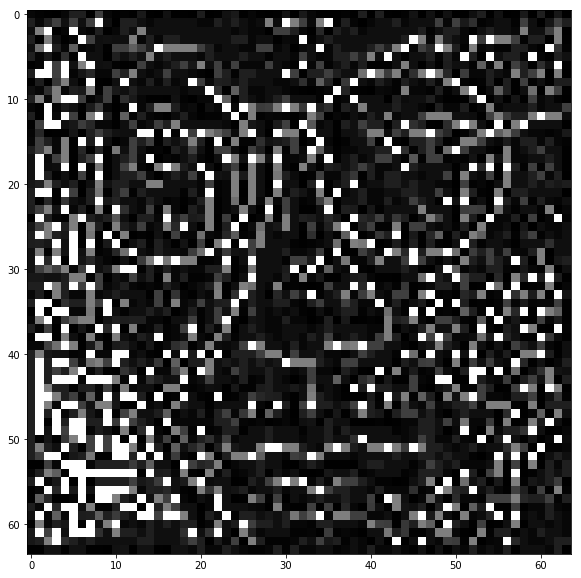

In [10]:
from skimage.feature import local_binary_pattern

## setting for LBP
radius = 1
n_points = 8 * radius

lbp = local_binary_pattern(img, n_points, radius, method = 'ror')
plt.imshow(lbp, interpolation='nearest')


(array([ 255.,  297.,  257.,  535.,  782.,  575.,  241.,  301.,  357.,  496.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

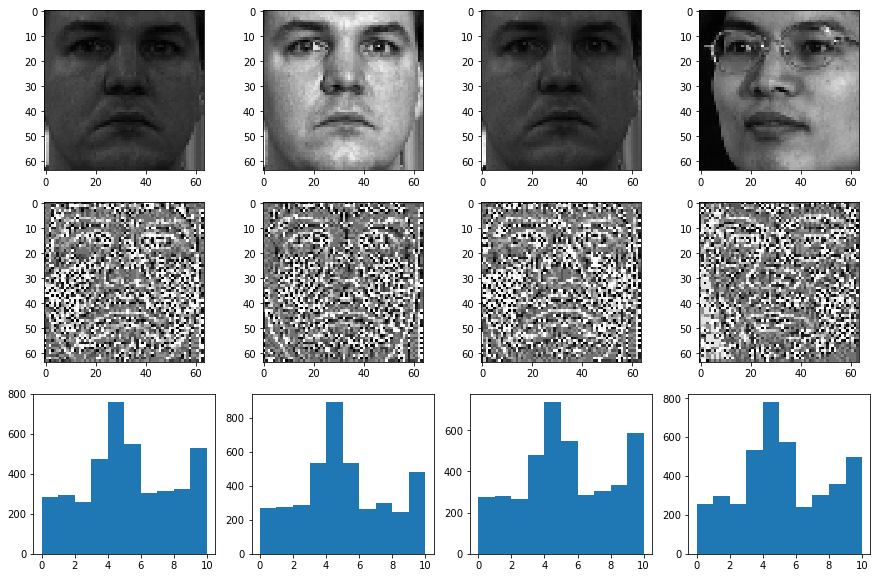

In [51]:
radius = 1
n_points = 8 * radius
n_bins = 256

img1 = X_train[8000].reshape((64,64))
img2 = X_train[8010].reshape((64,64))
img3 = X_train[8040].reshape((64,64))
img4 = X_train[10].reshape((64,64))

lbp_img1 = local_binary_pattern(img1, n_points, radius, method = 'uniform')
lbp_img2 = local_binary_pattern(img2, n_points, radius, method = 'uniform')
lbp_img3 = local_binary_pattern(img3, n_points, radius, method = 'uniform')
lbp_img4 = local_binary_pattern(img4, n_points, radius, method = 'uniform')

f, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8),(ax9, ax10, ax11, ax12)) = plt.subplots(3, 4)
ax1.imshow(img1, interpolation='nearest')
ax2.imshow(img2, interpolation='nearest')
ax3.imshow(img3, interpolation='nearest')
ax4.imshow(img4, interpolation='nearest')

ax5.imshow(lbp_img1, interpolation='nearest')
ax6.imshow(lbp_img2, interpolation='nearest')
ax7.imshow(lbp_img3, interpolation='nearest')
ax8.imshow(lbp_img4, interpolation='nearest')

ax9.hist(lbp_img1.ravel(), bins=np.arange(0, n_points + 3),range=(0, n_points + 2))
ax10.hist(lbp_img2.ravel(), bins=np.arange(0, n_points + 3),range=(0, n_points + 2))
ax11.hist(lbp_img3.ravel(),  bins=np.arange(0, n_points + 3),range=(0, n_points + 2))
ax12.hist(lbp_img4.ravel(),  bins=np.arange(0, n_points + 3),range=(0, n_points + 2))


(array([ 234.,  322.,  338.,  479.,  743.,  504.,  208.,  279.,  267.,  722.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

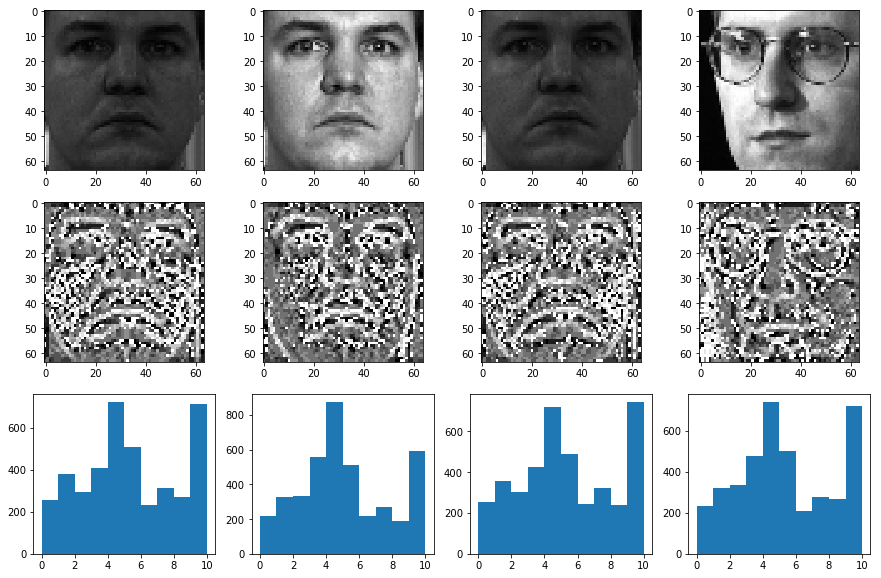

In [86]:
radius = 2
n_points = 8
n_bins = 64

img1 = X_train[8000].reshape((64,64))
img2 = X_train[8010].reshape((64,64))
img3 = X_train[8040].reshape((64,64))
img4 = X_train[50].reshape((64,64))

lbp_img1 = local_binary_pattern(img1, n_points, radius, method = 'uniform')
lbp_img2 = local_binary_pattern(img2, n_points, radius, method = 'uniform')
lbp_img3 = local_binary_pattern(img3, n_points, radius, method = 'uniform')
lbp_img4 = local_binary_pattern(img4, n_points, radius, method = 'uniform')

f, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8),(ax9, ax10, ax11, ax12)) = plt.subplots(3, 4)
ax1.imshow(img1, interpolation='nearest')
ax2.imshow(img2, interpolation='nearest')
ax3.imshow(img3, interpolation='nearest')
ax4.imshow(img4, interpolation='nearest')

ax5.imshow(lbp_img1, interpolation='nearest')
ax6.imshow(lbp_img2, interpolation='nearest')
ax7.imshow(lbp_img3, interpolation='nearest')
ax8.imshow(lbp_img4, interpolation='nearest')

ax9.hist(lbp_img1.ravel(), bins=np.arange(0, n_points + 3),range=(0, n_points + 2))
ax10.hist(lbp_img2.ravel(), bins=np.arange(0, n_points + 3),range=(0, n_points + 2))
ax11.hist(lbp_img3.ravel(),  bins=np.arange(0, n_points + 3),range=(0, n_points + 2))
ax12.hist(lbp_img4.ravel(),  bins=np.arange(0, n_points + 3),range=(0, n_points + 2))


In [85]:
print kullback_leibler_divergence(hist_train[8010],hist_train[50])
print kullback_leibler_divergence(hist_train[8010],hist_train[8000])

0.00884225446648
0.0118566408664


In [77]:
def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


def match(refs, img):
    best_score = 10
    best_name = None
    lbp = local_binary_pattern(img, n_points, radius, METHOD)
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, normed=True, bins=n_bins, range=(0, n_bins))
    for name, ref in refs.items():
        ref_hist, _ = np.histogram(ref, normed=True, bins=n_bins,
                                   range=(0, n_bins))
        score = kullback_leibler_divergence(hist, ref_hist)
        if score < best_score:
            best_score = score
            best_name = name
    return best_name

In [37]:
print X_lbp_train

[[[   0.  113.   49. ...,  112.  112.  112.]
  [  69.    0.  255. ...,  120.  248.  124.]
  [  70.   60.   24. ...,  120.  248.  112.]
  ..., 
  [ 193.  241.  119. ...,  129.  195.  100.]
  [   7.   31.   28. ...,  247.  193.   64.]
  [   7.   30.   31. ...,   27.    3.    0.]]

 [[ 193.    0.   16. ...,  112.  240.  112.]
  [  66.  124.  191. ...,  120.  120.  112.]
  [  68.   60.  255. ...,  120.  248.  120.]
  ..., 
  [ 199.  255.  253. ...,    2.  255.   68.]
  [ 199.  225.  241. ...,  199.  195.   64.]
  [   0.   23.   31. ...,    3.    7.    0.]]

 [[ 193.  193.   64. ...,  240.  112.  112.]
  [ 135.    3.    4. ...,  248.  112.  120.]
  [ 199.   70.   60. ...,  240.  112.  120.]
  ..., 
  [  68.  253.  249. ...,   31.   30.   28.]
  [ 197.  241.  241. ...,   30.   63.   12.]
  [   7.   31.   31. ...,   31.   30.   28.]]

 ..., 
 [[ 193.  112.   48. ...,  129.  193.    0.]
  [  64.   60.  252. ...,  135.  195.    4.]
  [   0.   60.  249. ...,  135.  195.   68.]
  ..., 
  [ 135.  

In [65]:
print X_train.shape
eps = 1e-7

N = X_train.shape[0]
X_lbp_train = np.zeros((N,64,64))
hist_train = np.zeros((N,n_points+2,))
for i in np.arange(N):
    X_lbp_train[i] = local_binary_pattern(X_train[i].reshape(64,64), n_points, radius, method = 'uniform')
    (hist, _) = np.histogram(X_lbp_train[i].ravel(), bins=np.arange(0, n_points + 3),range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    hist_train[i] = hist
    

(10262, 4096)


In [91]:
print X_train[1].reshape(64,64)
print X_train[8010]
print X_train[8000]
print X_train[10]

[[ 9 11  9 ..., 21 14 10]
 [10  9  6 ..., 28 20 17]
 [10  9  5 ..., 33 23 18]
 ..., 
 [ 6  6  6 ..., 30 29 33]
 [ 6  7  7 ..., 28 31 35]
 [ 8  7  7 ..., 29 31 36]]
[ 58  81  99 ..., 127 114 114]
[33 44 53 ..., 77 76 85]
[11 12 18 ..., 83 76 73]


In [66]:

print hist_train[:20]
print hist_train.shape

[[ 0.06201172  0.07592773  0.05419922  0.11328125  0.16894531  0.14160156
   0.07617187  0.07421875  0.09545898  0.13818359]
 [ 0.05883789  0.07641602  0.05664062  0.11474609  0.17285156  0.14599609
   0.06835937  0.07543945  0.10009766  0.13061523]
 [ 0.06103516  0.07495117  0.05395508  0.109375    0.18408203  0.14306641
   0.07324219  0.08154297  0.0871582   0.1315918 ]
 [ 0.06054687  0.07324219  0.06933594  0.12182617  0.18969727  0.13549805
   0.06396484  0.06982422  0.08520508  0.13085937]
 [ 0.05737305  0.07006836  0.07641602  0.13745117  0.20019531  0.1315918
   0.05615234  0.07299805  0.07666016  0.12109375]
 [ 0.05493164  0.06713867  0.07446289  0.13818359  0.19555664  0.14453125
   0.05908203  0.06274414  0.07519531  0.12817383]
 [ 0.05541992  0.06469727  0.06518555  0.13916016  0.21166992  0.14550781
   0.06738281  0.06542969  0.06811523  0.11743164]
 [ 0.05322266  0.07275391  0.06713867  0.1340332   0.19311523  0.15356445
   0.05761719  0.06811523  0.08056641  0.11987305]
 

In [67]:
N_test = X_test.shape[0]
X_lbp_test = np.zeros((N_test,64,64))
hist_test = np.zeros((N_test,n_points + 2,))
for i in np.arange(N_test):
    X_lbp_test[i] = local_binary_pattern(X_test[i].reshape(64,64), n_points, radius, method = 'uniform')
    (hist, _) = np.histogram(X_lbp_test[i].ravel(), bins=np.arange(0, n_points + 3),range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    hist_test[i] = hist
    

In [68]:
print hist_test
print hist_test.shape
print 

[[ 0.05761719  0.07324219  0.05175781 ...,  0.07495117  0.09179687
   0.13354492]
 [ 0.05200195  0.07006836  0.07080078 ...,  0.07080078  0.07666016
   0.12060547]
 [ 0.04248047  0.06469727  0.06616211 ...,  0.05908203  0.08447266
   0.09838867]
 ..., 
 [ 0.03662109  0.05615234  0.06469727 ...,  0.05371094  0.04052734
   0.07861328]
 [ 0.02832031  0.05883789  0.04418945 ...,  0.0703125   0.12548828
   0.10302734]
 [ 0.03540039  0.05322266  0.05566406 ...,  0.06176758  0.06054687
   0.0859375 ]]
(1292, 10)



In [75]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multiclass import OneVsRestClassifier

model = SVR(C=0.000000165, kernel ='linear')
print OneVsRestClassifier(model,-1).fit(hist_train, y_train).score(hist_test, y_test)


0.0363777089783


In [76]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(hist_train, y_train)
prediction = neigh.predict(hist_test)

print neigh.score(hist_test, y_test)
print prediction

0.102941176471
[47 51 51 ..., 42 51 52]


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model3 = LogisticRegression()

#train
model3.fit(hist_train, y_train)
predictions = model3.predict(hist_test)

print classification_report(y_test, predictions, digits = 4)

             precision    recall  f1-score   support

          1     0.0000    0.0000    0.0000        19
          2     0.0000    0.0000    0.0000        19
          3     0.0000    0.0000    0.0000        19
          4     0.0000    0.0000    0.0000        19
          5     0.0000    0.0000    0.0000        19
          6     0.0000    0.0000    0.0000        19
          7     0.0000    0.0000    0.0000        19
          8     0.0000    0.0000    0.0000        19
          9     0.0000    0.0000    0.0000        19
         10     0.0000    0.0000    0.0000        19
         11     0.0000    0.0000    0.0000        19
         12     0.0000    0.0000    0.0000        19
         13     0.0000    0.0000    0.0000        19
         14     0.0000    0.0000    0.0000        19
         15     0.1250    0.0526    0.0741        19
         16     0.0000    0.0000    0.0000        19
         17     0.1000    0.1053    0.1026        19
         18     0.0000    0.0000    0.0000   

In [67]:
print predictions
print predictions.shape
print hist_test
print hist_test.shape

[43 43 65 ..., 65 43 43]
(1292,)
[[ 0.05761719  0.01635742  0.00195312 ...,  0.00878906  0.01245117
   0.09179688]
 [ 0.05200195  0.01123047  0.00292969 ...,  0.00537109  0.01391602
   0.07666016]
 [ 0.04248047  0.01342773  0.00390625 ...,  0.00463867  0.00878906
   0.08447266]
 ..., 
 [ 0.03662109  0.01147461  0.00390625 ...,  0.00415039  0.01049805
   0.04052734]
 [ 0.02832031  0.0144043   0.0012207  ...,  0.00878906  0.00927734
   0.12548828]
 [ 0.03540039  0.01049805  0.00317383 ...,  0.00732422  0.01025391
   0.06054688]]
(1292, 256)
(42033152,)


In [50]:
print classification_report(y_test, predictions, digits = 4)

             precision    recall  f1-score   support

          1     0.1053    0.1053    0.1053        19
          2     0.2353    0.2105    0.2222        19
          3     0.0000    0.0000    0.0000        19
          4     0.0000    0.0000    0.0000        19
          5     0.0000    0.0000    0.0000        19
          6     0.0541    0.1053    0.0714        19
          7     0.0000    0.0000    0.0000        19
          8     0.0000    0.0000    0.0000        19
          9     0.0000    0.0000    0.0000        19
         10     0.2800    0.3684    0.3182        19
         11     0.0000    0.0000    0.0000        19
         12     0.0625    0.0526    0.0571        19
         13     0.2500    0.0526    0.0870        19
         14     0.2000    0.0526    0.0833        19
         15     0.0870    0.1053    0.0952        19
         16     0.0000    0.0000    0.0000        19
         17     0.3000    0.1579    0.2069        19
         18     0.0000    0.0000    0.0000   

In [48]:
model2 = LogisticRegression()

#train
model2.fit(hist_train, y_train)
predictions = model2.predict(hist_test)
print predictions
print y_test
print classification_report(y_test, predictions, digits = 4)

[33 22 24 ..., 46 22 46]
[68 68 68 ...,  1  1  1]
             precision    recall  f1-score   support

          1     0.0000    0.0000    0.0000        19
          2     0.0000    0.0000    0.0000        19
          3     0.5000    0.0526    0.0952        19
          4     0.1111    0.0526    0.0714        19
          5     0.0000    0.0000    0.0000        19
          6     1.0000    0.0526    0.1000        19
          7     0.0000    0.0000    0.0000        19
          8     0.1053    0.1053    0.1053        19
          9     0.0000    0.0000    0.0000        19
         10     0.2174    0.2632    0.2381        19
         11     0.0000    0.0000    0.0000        19
         12     0.0000    0.0000    0.0000        19
         13     0.0000    0.0000    0.0000        19
         14     0.0000    0.0000    0.0000        19
         15     0.5000    0.1053    0.1739        19
         16     0.0000    0.0000    0.0000        19
         17     0.0000    0.0000    0.0000      

In [126]:
print predictions


[16 68 49 ..., 29 52 45]
